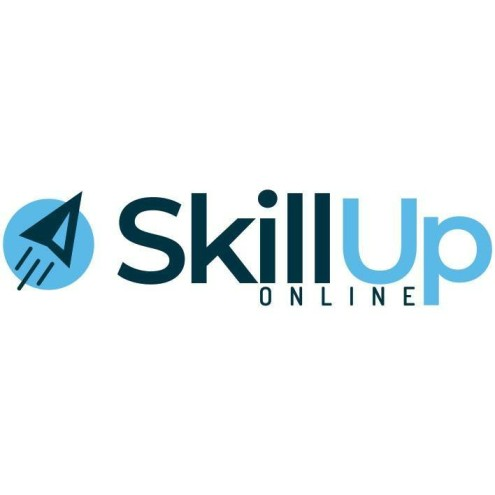

# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importa las bibliotecas necesarias

In [1]:
# Importa las bibliotecas necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Importa y organiza el dataset

In [2]:
# Leemos el archivo csv y lo organizamos en un dataframe.
data = pd.read_csv("creditcard.csv")

In [3]:
# Quiero saber las columnas y sus nombres.
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
# También quiero saber que tipo de datos maneja cada columna.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Visualizo las diez primeras filas.
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### Limpia los datos

a. Valores perdidos

In [6]:
# Vemos el resultado de sumar los valores nulos en cada columna.
# Comprobamos que no hay valores nulos (0).
# Si hubiera nulos se podría eliminar la fila con data_sin_nulos=data.dropna().
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


b. Datos duplicados

In [7]:
# Podemos ver que hay filas duplicadas.
duplicadas = data.duplicated().sum()
duplicadas

1081

In [8]:
# Compruebo el número de filas que hay en el dataframe.
filas_antes_borrado = data.shape[0]
filas_antes_borrado

284807

In [9]:
# Borro las filas duplicadas
data.drop_duplicates(inplace=True)

In [10]:
# Compruebo de nuevo el número de filas después del borrado.
filas_despues_borrado = data.shape[0]
filas_despues_borrado

283726

In [11]:
# Debe coincidir el número duplicados con la diferencia de filas antes/después.
filas_antes_borrado - filas_despues_borrado == duplicadas

True

### Analiza los datos

Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?



In [12]:
# Calcula el porcentaje de transacciones fraudulentas.
operaciones_fraudulentas = data['Class'].sum()
total_registros = data['Class'].count()
porcentaje_fraude = (operaciones_fraudulentas / total_registros) * 100
# Muestra el porcentaje de transacciones fraudulentas.
print(f"Porcentaje de fraude {porcentaje_fraude:.2f} %")

Porcentaje de fraude 0.17 %


Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas?



In [13]:
# Calcula el importe medio de las transacciones fraudulentas.
filtrado = data[data["Class"] == 1]
media_amount_fraudulentas = filtrado['Amount'].mean()

# Muestra el importe medio de las transacciones fraudulentas.
print(f"Importe medio de las transacciones fraudulentas {media_amount_fraudulentas:.2f}")

Importe medio de las transacciones fraudulentas 123.87


In [14]:
# Visualizamos la media de las fraudulentas y de las no fraudulentas.
data.groupby('Class')['Amount'].mean()

,Amount
Class,
0,88.413575
1,123.871860


### Visualiza los datos


Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

In [15]:
# Cuenta el número de transacciones fraudulentas y no fraudulentes.
transacciones_fraudulentas = operaciones_fraudulentas
transacciones_no_fraudulentas = len(data) - transacciones_fraudulentas

# Creo una variable que ponga el 0=Fraudulentas y el 1=No Fraudulentas.
Class_etiqueta = data['Class'].map({0: 'No Fraudulentas', 1: 'Fraudulentas'})
# Le asigno colores diferentes a esas categorías.
colores = data['Class'].map({0: 'skyblue', 1: 'red'})

print(f"Número de transacciones fraudulentas: {transacciones_fraudulentas}")
print(f"Número de transacciones no fraudulentas: {transacciones_no_fraudulentas}")

Número de transacciones fraudulentas: 473
Número de transacciones no fraudulentas: 283253


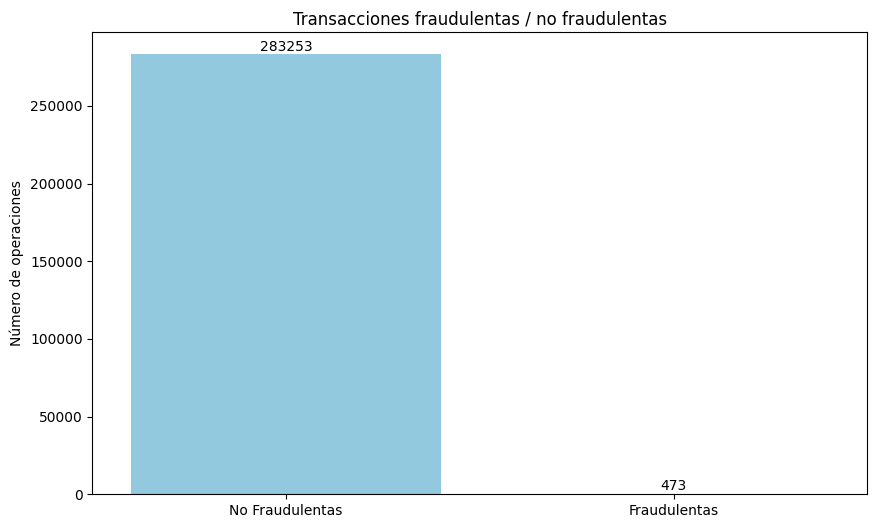

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x=Class_etiqueta, palette=['skyblue', 'red'])
plt.xlabel('')
plt.ylabel('Número de operaciones')
plt.title('Transacciones fraudulentas / no fraudulentas')

# Añadir anotaciones para los valores.
frecuencia = Class_etiqueta.value_counts()
for i, valor in enumerate(frecuencia):
  ax.text(i, valor + 2000, str(valor), ha='center')
plt.show()

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)


In [17]:
# Separa los datos de transacciones fraudulentas - Histograma.
data_fraudulentas = data[data["Class"] == 1]['Amount']
data_fraudulentas.describe()

,Amount
count,473.000000
mean,123.871860
std,260.211041
min,0.000000
25%,1.000000
50%,9.820000
75%,105.890000
max,2125.870000


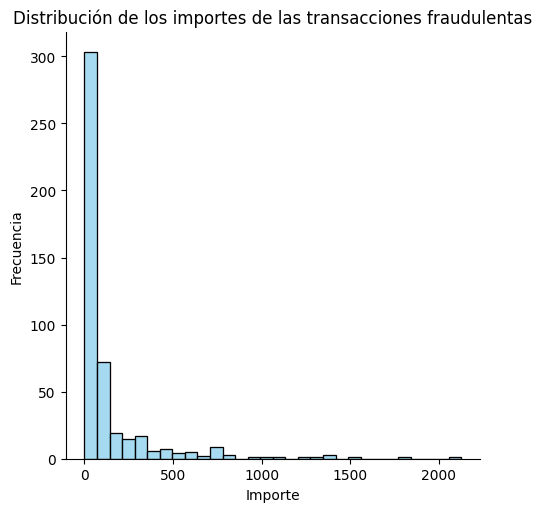

In [18]:
# Muestra la distribución de los importes de las transacciones fraudulentas.
sns.displot(data_fraudulentas, bins = 30, color='skyblue')
plt.xlabel('Importe')
plt.ylabel('Frecuencia')
plt.title('Distribución de los importes de las transacciones fraudulentas')
plt.show()

## Desarrollo y evaluación de modelos

### Separa del dataset

In [19]:
# Separa los datos de entrenamiento y evaluación.
from sklearn.model_selection import train_test_split
x = data.drop('Class', axis=1)
y = data['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47)

### Crea y evalúa los modelos

In [20]:
# Al ser un conjunto de datos muy grande, nos decidimos por el RandomFrorest por ser más rápido que la máquina de vectores
# Importamos el modelo a utilizar y métricas.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [21]:
# Creamos y entrenamos al modelo
model = RandomForestClassifier(max_depth=150, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=150, random_state=42)

In [22]:
# Hacer predicciones con los datos de test
y_pred = model.predict(x_test)

In [23]:
# Observamos la métrica classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56654
           1       0.96      0.73      0.83        92

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



###Conclusiones

Referente a las transacciones no fraudulentas, podemos ver que el acierto es del 100 %. Si nos fijamos en las transacciones fraudulentas el modelo es capaz de acertar en un 96 %, sin embargo, sólo está capturando el 73 % del total de transacciones fraudulentas.
Se podría considerar ajustar el modelo para mejorar ese recall bajo o incluso cambiarlo por un modelo de máquina de vectores.

In [24]:
# Métrica Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")

Exactitud del modelo: 99.95%


In [25]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[56651,     3],
       [   25,    67]])

###Interpretación

El modelo clasificó correctamente 56651 de las transacciones no fraudulentas, y 67 de las fraudulentas. Ahora bien, tenemos 3 falsos positivos y 25 falsos negativos, lo que concuerda con los datos ya vistos y con la interpretación anteriormente dada.